## 1. Data 불러오기

In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기
df = pd.read_csv('../../data/english_humbnailtext_preprocessed.csv', encoding='UTF-8')
df.head(3)

,views,content,area,content_tokens
0,3,Sweets How,1125,"['sweet', 'how']"
1,4,,0,[]
2,3,,0,[]


In [4]:
from keras.utils import to_categorical #2번 실행하기

In [5]:
y = to_categorical(df['views']).astype('int64')
y

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [6]:
#df['content_tokens'][0].strip("[]").split(', ')[0].strip("'")
for index in range(len(df)):
    df['content_tokens'][index] = [ s.strip("'") for s in df['content_tokens'][index].strip("[]").split(', ')]

<ipython-input-6-20bc793e3162>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_tokens'][index] = [ s.strip("'") for s in df['content_tokens'][index].strip("[]").split(', ')]


## 2 set train & test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['content_tokens'], y, test_size = 0.2, random_state = 42)

In [9]:
X_test

3526                         [happen, in, mah, layp, iii]
4329                                               [occi]
3717                                                [all]
23                                     [i, "'m", comfort]
1833                        [wuhan, ant, del, coronaviru]
                              ...                        
2481    [pianot, kaitlyn, "'s", 1st, piano, lesson, (,...
2029                                 [tiktok, life, hack]
1967                           [teen, more, natur, birth]
2115                                 [nyg, !, !, !, vlog]
2653    [senshont, templ, tokyo, tour, part, ii, subsc...
Name: content_tokens, Length: 924, dtype: object

In [10]:
y_train

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'': 1, 'vlog': 2, '!': 3, 'in': 4, 'a': 5, '?': 6, '#': 7, 'my': 8, 'the': 9, 'no': 10, 'to': 11, '.': 12, 'i': 13, 'day': 14, '"\'s"': 15, '1': 16, 'copyright': 17, 'of': 18, 'life': 19, '&': 20, 'with': 21, '2': 22, 'challeng': 23, ',': 24, 'new': 25, 'de': 26, 'viog': 27, 'tour': 28, '3': 29, 'it': 30, 'part': 31, 'me': 32, 'cambridg': 33, ':': 34, 'first': 35, 'home': 36, 'for': 37, 'do': 38, '24': 39, 'you': 40, 'what': 41, 'week': 42, 'la': 43, ')': 44, 'na': 45, 'birthday': 46, '$': 47, 'school': 48, '5': 49, 'en': 50, '10': 51, 'hous': 52, 'lo': 53, 'univers': 54, '...': 55, 'and': 56, '6': 57, '(': 58, 'offici': 59, 'shop': 60, 'is': 61, 'aguilar': 62, 'hour': 63, 'move': 64, 'el': 65, '2019': 66, 'n': 67, 'our': 68, 'on': 69, 'colleg': 70, 'at': 71, 'live': 72, 'con': 73, 'e': 74, 'famili': 75, 'vs': 76, 'travel': 77, 'year': 78, 's': 79, 'happi': 80, 'view': 81, 'r': 82, 'mi': 83, 'time': 84, 'prank': 85, 'o': 86, 'routin': 87, '4': 88, 'korea': 89, 'not': 90, 'by': 91, 'sa

In [13]:
threshold = 2                         
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0                          # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                        # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                         # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4906
등장 빈도가 1번 이하인 희귀 단어의 수: 3539
단어 집합에서 희귀 단어의 비율: 72.13615980432124
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 24.395119597435723


In [77]:
'''
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

print('단어 집합의 크기 :',len(tokenizer.word_counts))
print('단어 집합의 크기 :',len(tokenizer.word_index))
'''

"\n# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.\n# 0번 패딩 토큰을 고려하여 + 1\nvocab_size = total_cnt - rare_cnt + 1\nprint('단어 집합의 크기 :',vocab_size)\n\n# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.\nwords_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거\nfor w in words_frequency:\n    del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제\n    del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제\n\nprint('단어 집합의 크기 :',len(tokenizer.word_counts))\nprint('단어 집합의 크기 :',len(tokenizer.word_index))\n"

In [78]:
#print(tokenizer.word_index)

## 3. token to sequence

In [14]:
# keras tokenizer -> 텍스트 시퀀스 숫자 시퀀스로 변환
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
print(X_train[:3])
print(X_test[:3])

[[1368, 62, 787, 1369, 1370, 183, 1371, 50, 1372, 24, 1373, 6, 338], [418, 34, 1374], [788, 1375, 789, 1376, 1377, 339, 1378, 790]]
[[1072, 4, 223], [], [177]]


In [16]:
import matplotlib.pyplot as plt

발화문의 최대 길이 : 66
발화문의 평균 길이 : 3.927179209528966


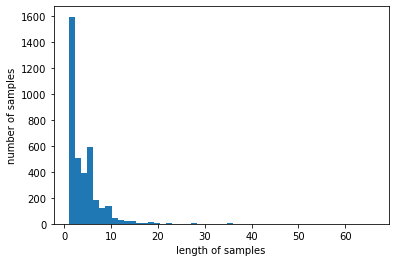

In [17]:
print('발화문의 최대 길이 :',max(len(l) for l in X_train))
print('발화문의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [19]:
max_len = 15
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율: 98.61938278289118


In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
# 모든 샘플의 길이 15으로 맞추기
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [22]:
X_train

array([[   0,    0, 1368, ..., 1373,    6,  338],
       [   0,    0,    0, ...,  418,   34, 1374],
       [   0,    0,    0, ...,  339, 1378,  790],
       ...,
       [   0,    0,    0, ...,  607,  546, 4905],
       [   0,    0,    0, ...,    2,   10,   17],
       [   0,    0,    0, ...,   13, 4906,  222]])

## 4. LSTM

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
model = Sequential([
    Embedding(total_cnt+1, 100),  ##total_cnt가 아니라 vocab_size로 한번 나오는 단어는 제거하고 다시 해보기 
    LSTM(128,  dropout= 0.2),
    Dense(6,activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         490700    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 608,722
Trainable params: 608,722
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('Bi-LSTM_class6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [27]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=50, validation_data=(X_test, y_test))

Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 1.5873 - acc: 0.3318
Epoch 00001: val_acc improved from -inf to 0.31710, saving model to Bi-LSTM_class6.h5
74/74 [==============================] - 4s 58ms/step - loss: 1.5860 - acc: 0.3319 - val_loss: 1.5606 - val_acc: 0.3171
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 1.5016 - acc: 0.3982
Epoch 00002: val_acc improved from 0.31710 to 0.39935, saving model to Bi-LSTM_class6.h5
74/74 [==============================] - 3s 41ms/step - loss: 1.5016 - acc: 0.3982 - val_loss: 1.4895 - val_acc: 0.3994
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 1.2938 - acc: 0.5073
Epoch 00003: val_acc improved from 0.39935 to 0.40693, saving model to Bi-LSTM_class6.h5
74/74 [==============================] - 3s 39ms/step - loss: 1.2938 - acc: 0.5073 - val_loss: 1.5430 - val_acc: 0.4069
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 1.0280 - acc: 0.6240
Epoch 00004: val_acc

## model test

In [28]:
loaded_model = load_model('Bi-LSTM_class6.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

29/29 [==============================] - 0s 9ms/step - loss: 1.5430 - acc: 0.4069

 테스트 정확도: 0.4069


In [29]:
import numpy as np

In [30]:
pred = np.argmax(loaded_model.predict(X_test), axis=-1)

In [31]:
true = [np.argmax(y_test[i]) for i in range(len(y_test))]

In [32]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00        49
           2       0.38      0.15      0.22       159
           3       0.47      0.37      0.42       291
           4       0.39      0.83      0.53       293
           5       0.00      0.00      0.00        41

    accuracy                           0.41       924
   macro avg       0.21      0.23      0.19       924
weighted avg       0.34      0.41      0.34       924



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(true, pred)  # confusion matrix 계산
# plt.figure(figsize = (14, 8))
# sns.heatmap(conf_mat, annot=True) # heatmap으로 나타내기

# Class 별 Accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)  # 각 클래스 별 accuracy 담은 list
class_accuracy = pd.DataFrame(class_accuracy, columns = ['Accuracy']) # dataframe 화하기

In [34]:
cat_to_id = {0:0, 1:1, 10:2, 100:3, 1000:4, 10000:5}
id_to_cat = {0:0, 1:1, 2:10, 3:100, 4:1000, 5:10000}

In [35]:
class_accuracy.insert(0, 'View Category', list(cat_to_id.keys())[:20])
class_accuracy

,View Category,Accuracy
0,0,0.000000
1,1,0.000000
2,10,15.094340
3,100,37.113402
4,1000,83.276451
5,10000,0.000000
